# Linear Regression - Health Insurance Cost Forecast

* Project Scope: Analyze,Visualize and apply Linear Regression model on Insurance data
* Data source: insurance.csv file
* The data contains the following columns:
    * 'age': Age 
    * 'sex': Gender
    * 'bmi': Body Mass Index
    * 'Children': Number of children
    * 'smoker': Smoker yes or no
    * 'region': US region
    * 'charges': Insurance charges

## Import libraries & Load data

In [326]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
dataset = pd.read_csv('insurance.csv')

## Lets check the data

In [327]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


* We can see there are 7 Columns and its datatypes:
* Out of 7 columns, 6 are input variables/features (X), 1 output /target variable (y) 
* There are 1338 rows/training examples (m)

In [328]:
# Checking for null columns
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

we see that there are no null data in any columns

In [329]:
# lets check the data
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data in this data set is self explanatory

In [330]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This gives descriptive statistics that sumarize the central tendency of numarical columns

* We can notice that avg age in our dataset is 39 years and with avg of one child per insuree

## Let's analyze and visualize data

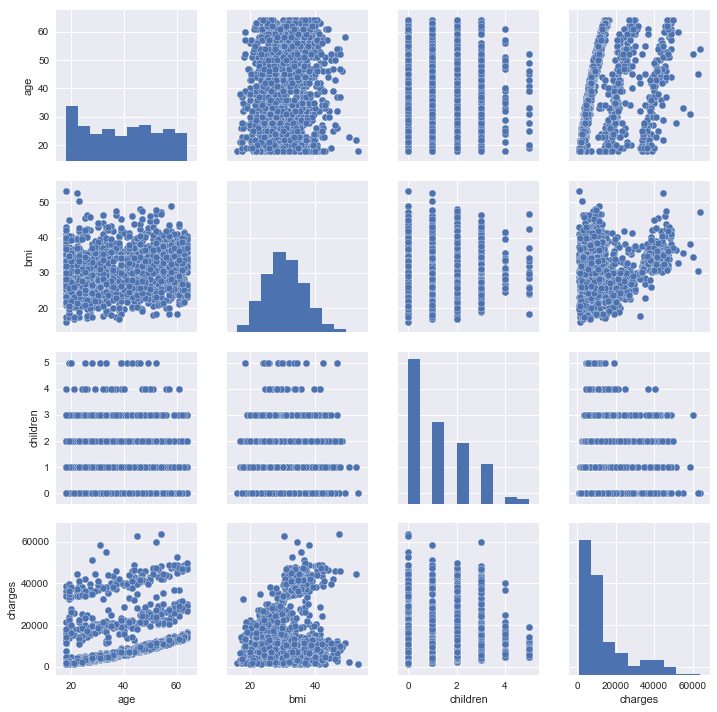

In [331]:
sns.pairplot(dataset)

We can notice, 
* As age increases, charges also increasing
* bmi is normally distributed
* A large number of insurees dont have children

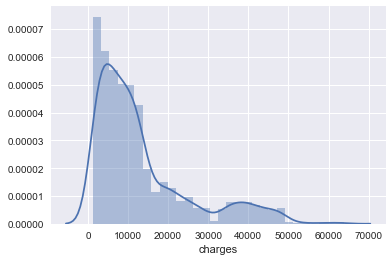

In [332]:
sns.distplot(dataset['charges'])
plt.show()

In [333]:
#Lets check the correlation between different variables
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


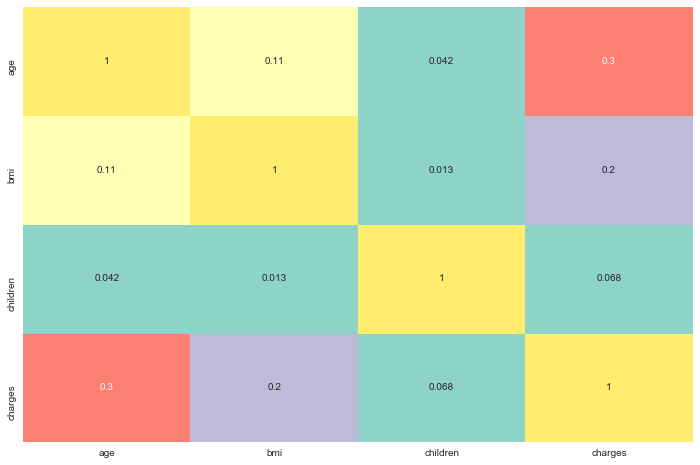

In [334]:
#Correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True,cbar=False, cmap = 'Set3')
plt.show()

We can notice variables are positely correlated. Out of all, age is more correlated to charges

In [335]:
# data distribution analysys
dataset['bmi'] = dataset['bmi'].apply(lambda x: int(x))
variables = ['sex','smoker','region','age','bmi','children']
for v in variables:
    print(v)
    dataset = dataset.sort_values(by=[v])
    d = dataset[v].value_counts()
    print(d)

sex
male      676
female    662
Name: sex, dtype: int64
smoker
no     1064
yes     274
Name: smoker, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64
age
18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64
bmi
28    92
30    91
33    82
27    82
32    78
31    76
29    73
25    72
26    67
34    64
35    57
24    57
36    55
23    52
37    42
22    40
38    36
39    35
21    32
40    23
20    23
41    19
19    17
42    15
17    12
18     9
43     7
46     7
44     7
45     4
47     4
16     2
53     1
52     1
48     1
49     1
50   

Data distribution analysis


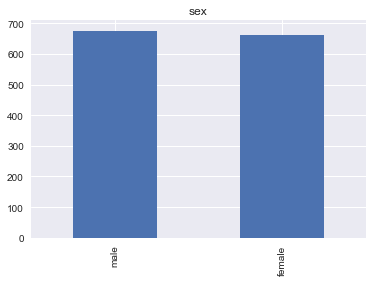

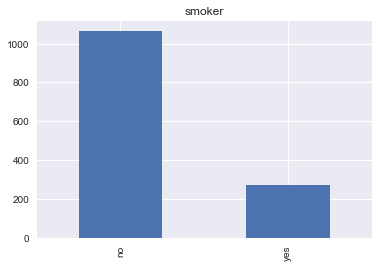

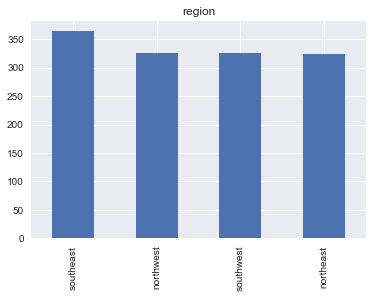

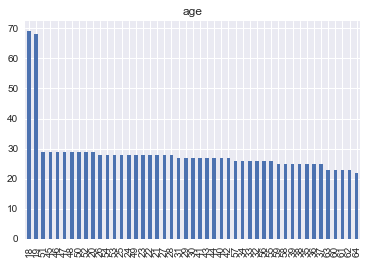

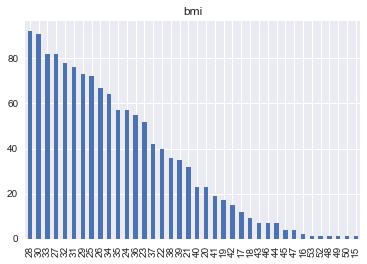

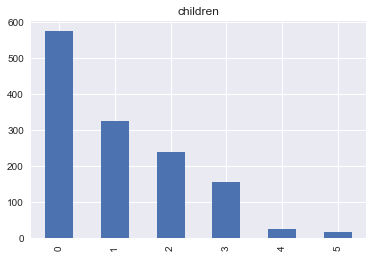

In [336]:
print('Data distribution analysis')
for v in variables:
    dataset = dataset.sort_values(by=[v])
    dataset[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Here are take away points from distribution analysis
* Almost male and female are equally distibuted in out data set
* More than 4 times non-smokers (79.5%) than smokers (20.5%)
* Southeast got slightly more representation. Otherwise, all regions are equally distributed
* Southeast 27.2%, northeast 24.2%, northwest 24.3%, southeast 24.3% 
* There are more young adults in out dataset
* Max bmi is about 53, min is about 15 and a large number of insurees have about 28 bmi
* About 43% insurees dont have dependents, 24% with one child, 18% with 2 child, 12% with 3 child and about 1.5% each for 4 & 5 children

## Data Pre-Processing

** Converting categorical features: sex, smoker, region **

In [337]:
# converting sex feature into binary
dataset['sex'] = dataset['sex'].map({'male':0, 'female':1})

In [338]:
# converting smoker feature into binary
dataset['smoker'] = dataset['smoker'].map({'no':0, 'yes':1})

In [339]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
172,18,0,15,0,0,northeast,1694.79640
1150,18,1,30,0,0,northeast,2203.73595
195,19,0,30,0,0,northwest,1639.56310
581,19,0,30,0,0,northwest,1639.56310
1196,19,1,30,0,1,northwest,33307.55080


In [340]:
# Converting regions feature into multiple features
dataset = pd.get_dummies(dataset,columns=['region'],drop_first=True)

In [341]:
dataset.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
172,18,0,15,0,0,1694.79640,0,0,0
1150,18,1,30,0,0,2203.73595,0,0,0
195,19,0,30,0,0,1639.56310,1,0,0
581,19,0,30,0,0,1639.56310,1,0,0
1196,19,1,30,0,1,33307.55080,1,0,0


** Adding X0 feature to dataset **

In [342]:
final_dataset = pd.concat([pd.DataFrame(np.ones((1338, 1)), dtype=np.int), dataset], 
                          axis=1, 
                          ignore_index=False)

In [343]:
final_dataset.head()

,0,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,1,19,1,27,0,1,16884.92400,0,0,1
1,1,18,0,33,1,0,1725.55230,0,1,0
2,1,28,0,33,3,0,4449.46200,0,1,0
3,1,33,0,22,0,0,21984.47061,1,0,0
4,1,32,0,28,0,0,3866.85520,1,0,0


** Spliting data into input and output variables **

In [344]:
X = final_dataset.drop('charges', axis =1)
y = final_dataset['charges']
for item in [X, y]:
    print(item.shape)

(1338, 9)
(1338,)


** Splitting the dataset into the Training set and Test set **

In [345]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

for item in [X_train, y_train, X_test,y_test]:
    print(item.shape)

(936, 9)
(936,)
(402, 9)
(402,)


** Fitting Linear Regression to the Training set **

In [346]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

# Stats Model
lr1 = sm.OLS(y_train, X_train).fit()

# sk-learn 
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Let's estimate the model coefficients and intercept **

In [347]:
### STATSMODELS ###
lr1.params

0                  -11714.777819
age                   256.557234
sex                    45.468935
bmi                   335.106329
children              477.706954
smoker              23451.892604
region_northwest     -559.349525
region_southeast    -1012.784247
region_southwest     -809.366373
dtype: float64

In [348]:
### SCIKIT-LEARN ###
print('Intercept: {}'.format(lr2.intercept_))
coeff_df = pd.DataFrame(lr2.coef_,X.columns,columns=['Coefficient'])
coeff_df

Intercept: -11714.777818932986


,Coefficient
0,0.000000
age,256.557234
sex,45.468935
bmi,335.106329
children,477.706954
smoker,23451.892604
region_northwest,-559.349525
region_southeast,-1012.784247
region_southwest,-809.366373


** Interpreting Model Coefficients **

Holding all other features fixed, 
- 1 unit increase in **age** is associated with an **increase of \$256.557234 ** in charges
- 1 unit increase in **sex** is associated with an **increase of \$45.468935 ** in charges 
- 1 unit increase in **bmi** is associated with an **increase of \$335.106329 ** in charges 
- 1 unit increase in **children** is associated with an **increase of \$477.706954 ** in charges
- 1 unit increase in **smoker** is associated with an **increase of \$23451.892604 **.
- region feature has negative influence on charges 

** Predicting Test set results **

In [349]:
### STATSMODELS ###
y_pred_stats = lr1.predict(X_test)

### SCIKIT-LEARN ###
y_pred_sklearn = lr2.predict(X_test)

## Evaluating the model

In [350]:
### STATSMODELS ###

# print the p-values for the model coefficients
lr1.pvalues

0                    1.571589e-21
age                  9.933320e-60
sex                  9.108127e-01
bmi                  1.706826e-21
children             4.727846e-03
smoker              1.035641e-242
region_northwest     3.437152e-01
region_southeast     8.742100e-02
region_southwest     1.673859e-01
dtype: float64

p-value: Represents the probability that the coefficient is actually zero

Interpreting p-values

* If the 95% confidence interval does not include zero
    - p-value will be less than 0.05
    - Reject the null
    - There is a relationship
* If the 95% confidence interval includes zero
    - p-value for that coefficient will be greater than 0.05
    - Fail to reject the null
    - There is no relationship
    
In our case we can clearly see that features 'sex', 'region' have pvalue greater than 0.05

In [351]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_sklearn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_sklearn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_sklearn)))
print('R2:', metrics.r2_score(y_test, y_pred_sklearn))

MAE: 4008.689364848897
MSE: 33395190.650820795
RMSE: 5778.85720976222
R2: 0.7905856733897649


In [352]:
# R squared value
metrics.explained_variance_score(y_test, y_pred_sklearn)

0.7909889971179433

In [353]:
### STATSMODELS evaluation###
print (lr1.rsquared, lr1.rsquared_adj)

0.7310769331245657 0.7287561299584346


## Feature selection

Based on error metrics and pvalues, lets remove features that have minimal impacts on outcome to increased accuracy of your model

In [354]:
X_new = final_dataset.drop(['charges','sex','region_southeast'],
                           axis =1)
y = final_dataset['charges']
for item in [X_new, y]:
    print(item.shape)

(1338, 7)
(1338,)


In [355]:
# spliting data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 0)

for item in [X_train, y_train, X_test,y_test]:
    print(item.shape)

(936, 7)
(936,)
(402, 7)
(402,)


In [356]:
# fitting data
# Stats Model
lr1 = sm.OLS(y_train, X_train).fit()

# sk-learn 
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [357]:
# predicting
### STATSMODELS ###
y_pred_stats = lr1.predict(X_test)

### SCIKIT-LEARN ###
y_pred_sklearn = lr2.predict(X_test)

In [358]:
### STATSMODELS evaluation###
print (lr1.rsquared, lr1.rsquared_adj)

0.7302242727424395 0.7284819106718847


In [359]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     419.1
Date:                Fri, 23 Nov 2018   Prob (F-statistic):          2.91e-260
Time:                        00:33:46   Log-Likelihood:                -9496.6
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     929   BIC:                         1.904e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
0                -1.179e+04   1176.447    -10.024      0.000   -1.41e+04   -9484.279
age                257.7463     14.612     17.639      0.000     229.070     286.423
bmi                319.3883     33.097      9.650      0.000     254.434     384.342
children           479.7204    168.754      2.843      0.005     148.537     810.904
smoker            2.341e+04    506.313     46.230      0.000    2.24e+04    2.44e+04
region_northwest   -50.5265    510.630     -0.099      0.921   -1052.648     951.595
region_southwest  -275.4158    496.264     -0.555      0.579   -1249.344     698.512
==============================================================================
Omnibus:                      231.361   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              563.376
Skew:                           1.304   Prob(JB):                    4.62e-123
Kurtosis:                       5.764   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
### SCIKIT-LEARN predicting ###

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_sklearn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_sklearn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_sklearn)))
print('R2:', metrics.r2_score(y_test, y_pred_sklearn))

MAE: 4007.6190063378112
MSE: 33562450.35644388
RMSE: 5793.310828571507
R2: 0.7895368224043544


** Checking if any statistically insignificant features using Backward Elimination & Adjusted R-Squared **

In [361]:
# Function for Backward Elimination with p-values and Adjusted R Squared:

import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((1338,9)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x

In [362]:
X_Modeled = backwardElimination(X.iloc[:].values, 0.05)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.2
Date:                Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                        00:33:48   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.197e+04    936.195    -12.782      0.0

To conclude, after Backward Elimination is applied, we can see model has improved its r-squared and adj r squared. With R-squared:0.75, Adj. R-squared:0.75 our linear regression model did ok with the data. We need more data to fine tune the model